In [147]:
import numpy as np
import seaborn as sns
import pandas as pd

## Use Case: NPS (Net Promoter Score)



#### Imagine you are a Data Analyst @ Airbnb

You've been asked to analyze user survey data and report NPS to the management

#### But, what exactly is NPS? 

#### Have you seen something like this ? 

Link: https://drive.google.com/file/d/1-u8e-v_90JdikorKsKzBM-JJqoRtzsN8/view?usp=sharing

<img src="https://drive.google.com/uc?id=1-u8e-v_90JdikorKsKzBM-JJqoRtzsN8">

This is called **Likelyhood to Recommend Survey**

- Responses are given a scale ranging from 0–10, 
    - with 0 labeled with “Not at all likely,” and 
    - 10 labeled with “Extremely likely.”

Based on this, we calculate the Net Promoter score



#### How to calculate NPS score? 

<img src="https://drive.google.com/uc?id=1KPIYlaN68vlL99iApaF5QbeBoyT24-Eu">

We label our responses into 3 categories:
- Detractors: Respondents with a score of 0-6
- Passive: Respondents with a score of 7-8
- Promoters: score of 9-10.

And
```
Net Promoter score = % Promoters - % Detractors.
```



#### How is NPS helpful?



####  Why would we want to analyse the survey data for NPS?


NPS helps a brand in gauging its brand value and sentiment in the market. 
- Promoters are highly likely to recommend your product or sevice. Hence, bringing in more business
- whereas, Detractors are likely to recommend against your product or service’s usage. Hence, bringing the business down.

These insights can help business make customer oriented decision along with product improvisation.

**Two third of Fortune 500 companies use NPS**


#### Lets first look at the data we have gathered


Dataset: https://drive.google.com/file/d/1c0ClC8SrPwJq5rrkyMKyPn80nyHcFikK/view?usp=sharing

<img width = 500 src="https://drive.google.com/uc?id=1arJhLlzbr_Rf7ONxpkzo726mLbTyLb_p">




#### Notice that the file contains the score for likelyhood to recommend survey


**Using NumPy** 
- we will bin our data into promoters/detractors
- calulate the percentage of promoters/detractors 
- calculate NPS



#### Let's first download the dataset

In [148]:
import numpy as np

#### Let's load the data we saw earlier. For this we will use `.loadtxt() function`

Documentation: https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

In [149]:
score = np.loadtxt('survey.txt', dtype ='int')

We provide file name along with the dtype of data we want to load in 

Let's see what the data looks like

In [150]:
score[:5]

array([ 7, 10,  5,  9,  9])

#### Let's check the number of responses

In [151]:
score.shape

(1167,)

There are a total of 1167 responses for the LTR survey 



#### Let's perform some sanity check on data

Let's check the minimum and max value in array

In [152]:
score.min()

1

In [153]:
score.max()

10

Now, let's calculate NPS using these response.

**NPS = % Promoters - % Detractors**

Now, in order to calculate NPS, we need to calculate two things:
- % Promoters
- % Detractors

In order to calculate % Promoters and % Detractors, we need to get the count of promoter as well as detractor.

#### Question: How can we get the count of Promoter/ Detractor ? 

We can do so by using fancy indexing (masking )

#### Let's get the count of promoter and detractors

Detractors have a score <=6

In [154]:
detractors = score[score <= 6].shape[0]

In [155]:
total = score.shape[0]

In [156]:
percent_detractors = detractors/total*100

In [157]:
percent_detractors

28.449014567266495

Similarly, Promoters have a score 9-10

In [158]:
promoters = score[score >= 9].shape[0]

In [159]:
percent_promoters = promoters/total*100

In [160]:
percent_promoters

52.185089974293064

 We will map our scores into 3 categories s.t:

- 0 - 6:  Detractors

- 7 - 8: Passive

- 9 - 10: Prometers

This process is called **binning**


#### But, why binning? 

Binning helps us reduce the number of unique values.
- simplifying the data without any significant loss of info.
- helps in quick absorption of information
- also helps in visualization (will be discussed later)
- also helps in simplyfying inputs ML models (hence, reducing computational complexity)

In [123]:
arr = np.empty(shape = score.shape, dtype = 'U10')

In [124]:
arr

array(['', '', '', ..., '', '', ''], dtype='<U10')

In [125]:
arr.shape

(1167,)

Instead of specifying the dtype as `str`, we initialize it as `Un` where n is the number of characters



Now, we have got a string array. Let's bin our score values

In [126]:
arr[score <= 6] = 'detractors'

In [127]:
arr

array(['', '', 'detractors', ..., 'detractors', '', ''], dtype='<U10')

Similarly, we can do it for passive and promoters

In [128]:
arr[(score >= 7) & (score <= 8)] = 'passive'

In [129]:
arr[score >= 9] = 'promoters'

In [130]:
arr

array(['passive', 'promoters', 'detractors', ..., 'detractors',
       'promoters', 'promoters'], dtype='<U10')

In [131]:
arr[:15]

array(['passive', 'promoters', 'detractors', 'promoters', 'promoters',
       'detractors', 'passive', 'promoters', 'promoters', 'promoters',
       'promoters', 'detractors', 'promoters', 'promoters', 'passive'],
      dtype='<U10')

Now, we have array with desired values.

#### How do we count the number of instance for each value ?

There are two ways of doing it.

Let's look at long way first. 

We do fancy indexing for each unique value and get the shape 

In [132]:
detractors_count = arr[arr == 'detractors'].shape[0]

In [133]:
detractors_count

332

In [134]:
passive_count = arr[arr == 'passive'].shape[0]
passive_count

226

In [135]:
promoters_count = arr[arr == 'promoters'].shape[0]
promoters_count

609

Now, there's a short way as well.

Numpy provides us a function `.unique()` to get unique element 

In [136]:
np.unique(arr)

array(['detractors', 'passive', 'promoters'], dtype='<U10')

But we want the count of each unique element.

For this, we can pass argument `return_counts = True`

In [137]:
np.unique(arr, return_counts = True)

(array(['detractors', 'passive', 'promoters'], dtype='<U10'),
 array([332, 226, 609], dtype=int64))

In [138]:
unique, counts = np.unique(arr, return_counts = True)

In [139]:
unique

array(['detractors', 'passive', 'promoters'], dtype='<U10')

In [140]:
counts

array([332, 226, 609], dtype=int64)

<AxesSubplot:xlabel='OVERALL DATA', ylabel='count'>

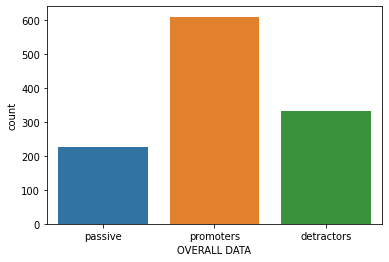

In [163]:
unique, counts = np.unique(arr, return_counts = True)

data = {'OVERALL DATA': arr}
df = pd.DataFrame(data)
sns.countplot(x=df['OVERALL DATA'],data=df)



Now, let's calculate the percent of promoters and detractors

#### % Promoters

In [164]:
percent_promoters = counts[2]/counts.sum()*100

#### % Detractors

In [165]:
percent_detractors = counts[0]/counts.sum()*100

#### Calculating NPS

For calculating NPS, we need to 

`% promoters - % detractors `

In [166]:
nps = percent_promoters - percent_detractors
nps

23.73607540702657

In [167]:
np.round(nps)

24.0